In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data=pd.read_csv("/content/ToyotaCorolla.csv",encoding='latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [12]:
data1=data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [13]:
data1.describe()


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [14]:
data1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [16]:
x=data1[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
y=data1['Price']

{'boxes': [<matplotlib.lines.Line2D at 0x7f5b43743750>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5b43748810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b43750850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b43750310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5b43743d50>,
  <matplotlib.lines.Line2D at 0x7f5b437482d0>]}

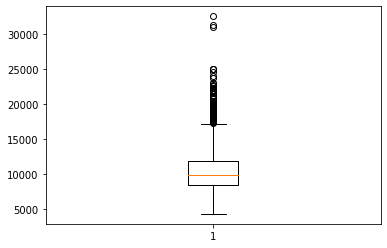

In [23]:
plt.boxplot(data1["Price"])


{'boxes': [<matplotlib.lines.Line2D at 0x7f5b436bd4d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5b436c3590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b436ca5d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b436ca090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5b436bdad0>,
  <matplotlib.lines.Line2D at 0x7f5b436c3050>]}

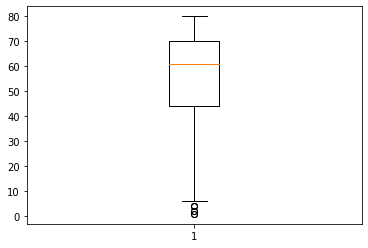

In [24]:
plt.boxplot(data1["Age_08_04"])


{'boxes': [<matplotlib.lines.Line2D at 0x7f5b4363c810>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5b436418d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b43647910>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b436473d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5b4363ce10>,
  <matplotlib.lines.Line2D at 0x7f5b43641390>]}

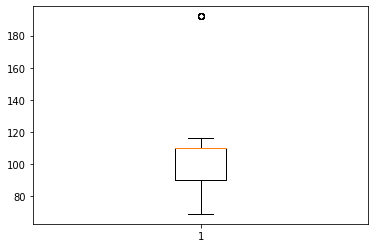

In [25]:
plt.boxplot(data1["HP"])


{'boxes': [<matplotlib.lines.Line2D at 0x7f5b435d0210>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5b43557210>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b4355f210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b43557c90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5b435d0750>,
  <matplotlib.lines.Line2D at 0x7f5b435d0c90>]}

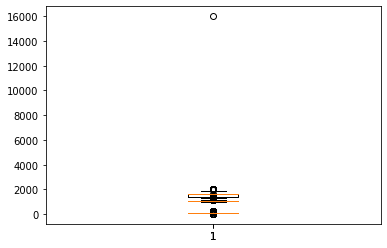

In [26]:
plt.boxplot(data1["cc"])


{'boxes': [<matplotlib.lines.Line2D at 0x7f5b43551a50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5b43553b10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b434dbb50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b434db610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5b43553090>,
  <matplotlib.lines.Line2D at 0x7f5b435535d0>]}

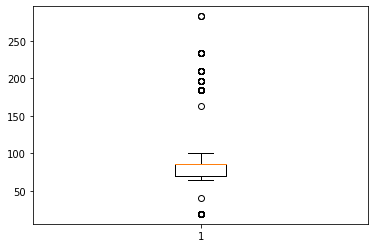

In [27]:
plt.boxplot(data1["Quarterly_Tax"])


{'boxes': [<matplotlib.lines.Line2D at 0x7f5b434b4e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5b434bae90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b434c1ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b434c1990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5b434ba410>,
  <matplotlib.lines.Line2D at 0x7f5b434ba950>]}

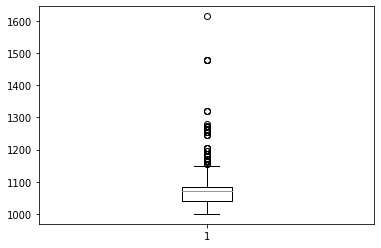

In [28]:
plt.boxplot(data1["Weight"])

Price, Age, KM, HP, Quarterly_Tax and Weight have outliers. 

In [29]:
model=sm.OLS(y,x).fit()
model.predict()

array([16899.91287782, 16368.55723627, 16882.469266  , ...,
        8503.97207018,  8631.4706538 , 10080.91955094])

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.247e+04
Date:                Thu, 03 Feb 2022   Prob (F-statistic):                        0.00
Time:                        12:43:39   Log-Likelihood:                         -12383.
No. Observations:                1436   AIC:                                  2.478e+04
Df Residuals:                    1428   BIC:                                  2.482e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -125.4510      2.445    -51.303      0.000    -130.248    -120.654
KM               -0.0205      0.001    -16.305      0.000      -0.023      -0.018
HP               33.4737      2.796     11.973      0.000      27.990      38.958
cc               -0.1032      0.090     -1.141      0.254      -0.281       0.074
Doors            -7.2494     40.184     -0.180      0.857     -86.075      71.576
Gears            78.3780    148.258      0.529      0.597    -212.449     369.205
Quarterly_Tax     5.8258      1.227      4.748      0.000       3.419       8.233
Weight           14.0322      0.773     18.157      0.000      12.516      15.548
==============================================================================
Omnibus:                      108.641   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.996
Skew:                           0.019   Prob(JB):                    5.59e-123
Kurtosis:                       6.067   Cond. No.                     3.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

98% of the data fits the regression model but cc ,doors and gears are insignificant .

In [34]:
## building an individual model
import statsmodels.formula.api as sm
m1_cc = sm.ols("Price~cc",data= data1).fit()
m1_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.55e-06
Time:                        12:49:09   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

cc is significant.

In [35]:
m1_doors = sm.ols("Price~Doors", data= data1).fit()
m1_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.46e-12
Time:                        12:49:59   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Doors is significant

In [36]:
m1_gears = sm.ols("Price~Gears",data= data1).fit()
m1_gears.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.733
Date:                Thu, 03 Feb 2022   Prob (F-statistic):             0.0168
Time:                        12:51:19   Log-Likelihood:                -13804.
No. Observations:                1436   AIC:                         2.761e+04
Df Residuals:                    1434   BIC:                         2.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4628.0652   2550.553      1.815      0.070    -375.149    9631.280
Gears       1214.1261    507.069      2.394      0.017     219.450    2208.802
==============================================================================
Omnibus:                      483.564   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.458
Skew:                           1.698   Prob(JB):                         0.00
Kurtosis:                       6.700   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Gears is insignificant

In [37]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,16.4,Age_08_04
1,7.6,KM
2,64.9,HP
3,17.2,cc
4,21.9,Doors
5,438.6,Gears
6,11.0,Quarterly_Tax
7,543.1,Weight


Gears and weight have very high VIF,we need to discard one of the variables to improve the model.

In [56]:
new=data1[['Age_08_04','KM','HP','cc','Quarterly_Tax','Weight']]

In [57]:
model1 = sm.ols("y~new",data= data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:30:08   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2669.4843   1051.241     -2.539      0.011   -4731.625    -607.344
new[0]      -121.7929      2.622    -46.449      0.000    -126.937    -116.649
new[1]        -0.0205      0.001    -16.411      0.000      -0.023      -0.018
new[2]        33.6858      2.741     12.288      0.000      28.308      39.063
new[3]        -0.1244      0.090     -1.377      0.169      -0.302       0.053
new[4]         4.1922      1.307      3.207      0.001       1.628       6.757
new[5]        16.8156      1.036     16.239      0.000      14.784      18.847
==============================================================================
Omnibus:                      148.179   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              952.170
Skew:                          -0.220   Prob(JB):                    1.73e-207
Kurtosis:                       6.965   Cond. No.                     2.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""